# Análise Exploratória

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

pd.options.plotting.backend = "plotly"
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
#leitura dos dados
total = (pd.read_csv('dataset/dataset_total.csv').set_index('Data').drop(['Consumidores', 'Dias'],axis=1)/1000)[:-36]
ma = total.Consumo.rolling(12, center=True).mean()

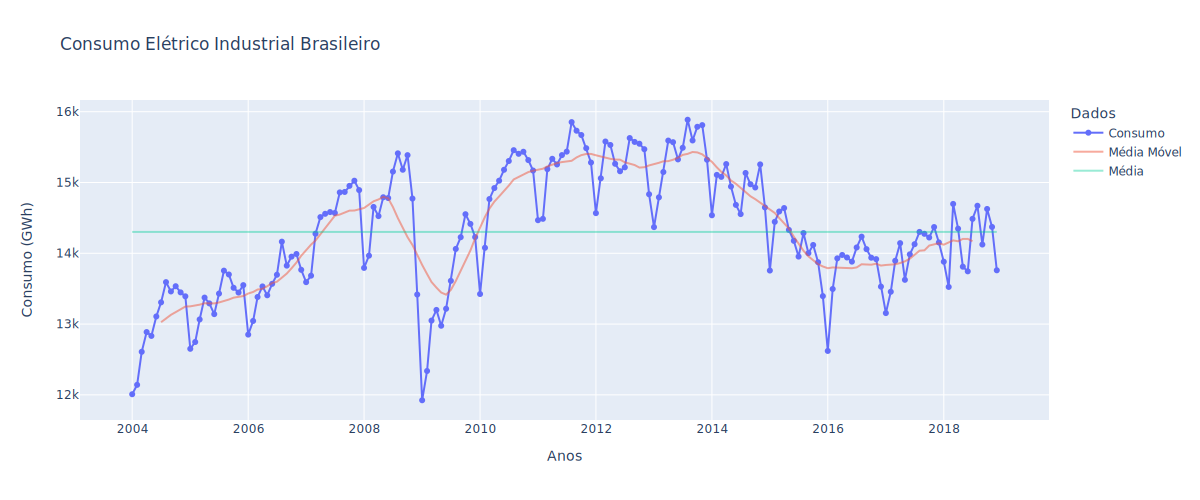

In [4]:
fig = px.line(total, markers=True, title='Consumo Elétrico Industrial Brasileiro', labels={"Data": 'Anos', "value": 'Consumo (GWh)', 'variable':'Dados'})
fig.add_trace(
    go.Scatter(
        x = total.index,
        y = ma,
        opacity=0.5,
        name='Média Móvel',
    )
)
fig.add_trace(
    go.Scatter(
        x=total.index,
        y=[total.Consumo.mean()]*180,
        opacity=0.4,
        name='Média'
    )
)
fig.update_layout(
    width=1200,
    #showlegend=False
)
fig.show()

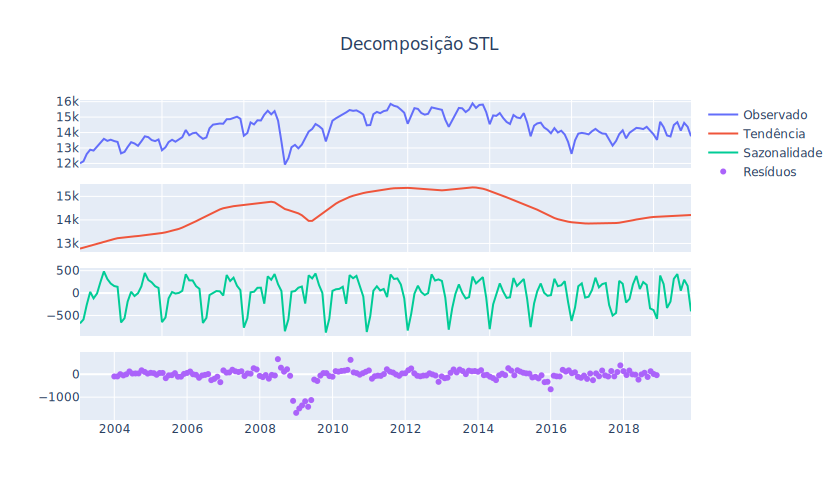

In [5]:
result = STL(total.Consumo, period=12, robust=True).fit()
x_values = total.Consumo.index

make_subplots(
    rows=4,
    cols=1,
    vertical_spacing=0.05,
).add_trace(
    go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observado'),
    row=1,
    col=1,
).add_trace(
    go.Scatter(x=x_values, y=result.trend, mode="lines", name='Tendência'),
    row=2,
    col=1,
).add_trace(
    go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Sazonalidade'),
    row=3,
    col=1,
).add_trace(
    go.Scatter(x=x_values, y=result.resid, mode="markers", name='Resíduos'),
    row=4,
    col=1,
).update_layout(
    width=840,
    #height=900, 
    title="Decomposição STL", margin={'t':100}, 
    title_x=0.5, 
    #showlegend=False
).update_xaxes(
    showticklabels=False
).update_xaxes(
    showticklabels=True, row=4, col=1)

In [6]:
#Teste de Estacionaridade
[adfuller(total['Consumo'], autolag='t-stat', regression='n')[1],
adfuller(total['Consumo'], autolag='t-stat', regression='c')[1],
adfuller(total['Consumo'], autolag='t-stat', regression='ct')[1],
adfuller(total['Consumo'], autolag='t-stat', regression='ctt')[1]]

[0.7027382646029963,
 0.1038038435744768,
 0.5114961085502463,
 0.039272352033799265]

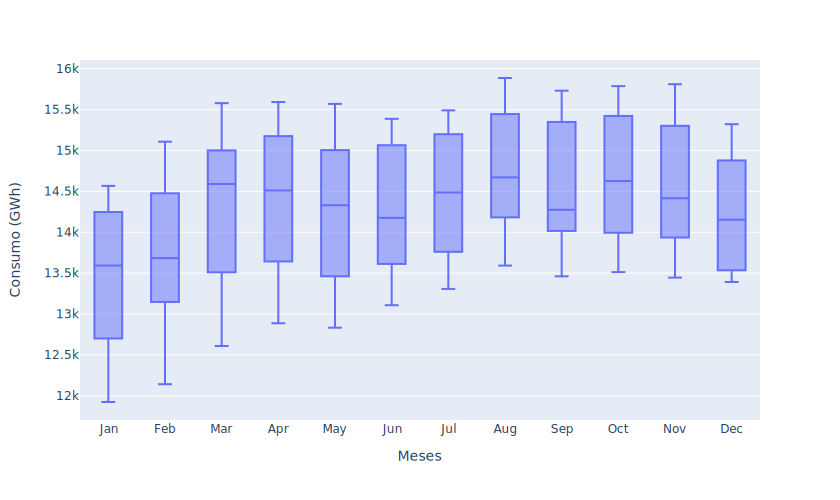

In [7]:
px.box(total['Consumo'].values.reshape(-1,12), labels={'variable': 'Meses', 'value': 'Consumo (GWh)'}).update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3,4,5,6,7,8,9,10,11],
        ticktext = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    ),

    width=840
)

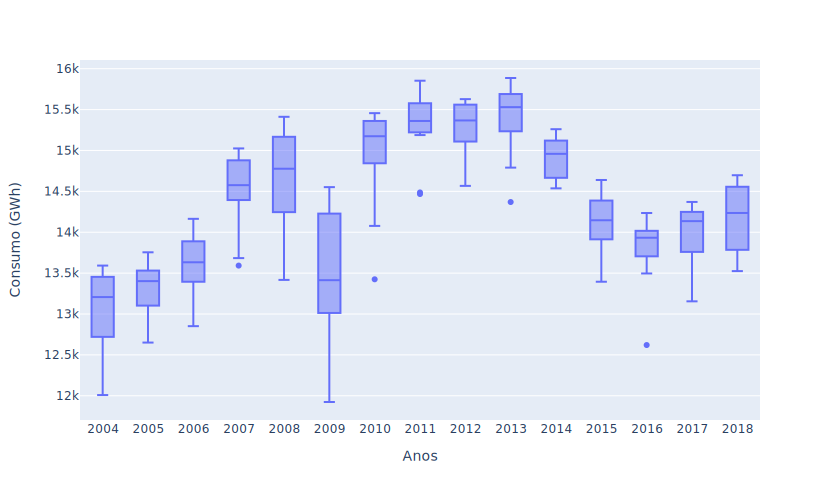

In [8]:
px.box(np.array([total['Consumo'].values.reshape(-1,12)[:,i] for i in range(12)]), labels={'variable': 'Anos', 'value': 'Consumo (GWh)'}).update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
        ticktext = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
    ),

    width=840
)

In [9]:
def describe(df, stats):
    
    d = df.describe(percentiles=[0.5])
    d = d.append(pd.Series((df.agg('std')/df.agg('mean')*100), name='CV'))
    return d.append(df.dropna().agg(stats))

describe(total.Consumo, ['skew', 'mad', 'kurt']).iloc[1:]

mean    14301.975311
std       878.349807
min     11923.919600
50%     14293.910230
max     15886.314000
0           6.141458
skew       -0.263902
mad       732.293824
kurt       -0.547040
dtype: float64

________________